In [487]:
#Scikit-Learn packages
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

# Computation and Visualisation packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [488]:
#Loading the titanic survival dataset
titanic_train = pd.read_csv('data/titanic_survival_prediction/train.csv')
titanic_test = pd.read_csv('data/titanic_survival_prediction/test.csv')

In [489]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [490]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [491]:
titanic_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [492]:
# Splitting into training and test dataset
#train, test = train_test_split(titanic, test_size = 0.40, random_state=35)

#print (train.info())
#print (test.info())

In [493]:
titanic_train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [494]:
# Understanding into number of null variables by columns for both train and test
print ("===== Train =====")
print (pd.isnull(titanic_train).sum())
print ("\n===== Test =====")
print (pd.isnull(titanic_test).sum())

===== Train =====
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

===== Test =====
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Visualising few of the columns from the dataset for better understanding

## Sex v/s Survived

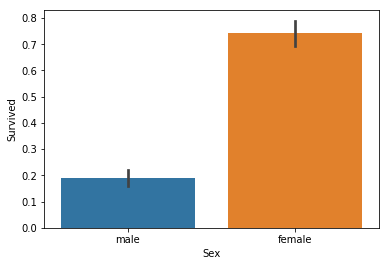

In [495]:
sns.barplot(x="Sex", y="Survived", data=titanic_train)
plt.show()

In [496]:
print("Percentage of females who survived:", titanic_train["Survived"][titanic_train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:", titanic_train["Survived"][titanic_train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

('Percentage of females who survived:', 74.203821656050948)
('Percentage of males who survived:', 18.890814558058924)


## Pclass v/s Survived

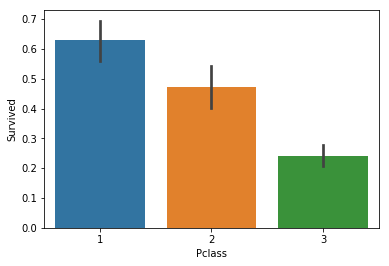

In [497]:
sns.barplot(x="Pclass", y="Survived", data=titanic_train)
plt.show()

In [498]:
print("Percentage of Pclass = 1 who survived:", titanic_train["Survived"][titanic_train["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 2 who survived:", titanic_train["Survived"][titanic_train["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 3 who survived:", titanic_train["Survived"][titanic_train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

('Percentage of Pclass = 1 who survived:', 62.962962962962962)
('Percentage of Pclass = 2 who survived:', 47.282608695652172)
('Percentage of Pclass = 3 who survived:', 24.236252545824847)


## SibSp v/s Survived

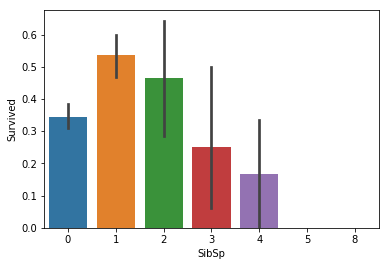

In [499]:
sns.barplot(x="SibSp", y="Survived", data=titanic_train)
plt.show()

In [500]:
print("Percentage of SibSp = 0 who survived:", titanic_train["Survived"][titanic_train["SibSp"] == 0].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 1 who survived:", titanic_train["Survived"][titanic_train["SibSp"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of SibSp = 2 who survived:", titanic_train["Survived"][titanic_train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

('Percentage of SibSp = 0 who survived:', 34.539473684210527)
('Percentage of SibSp = 1 who survived:', 53.588516746411486)
('Percentage of SibSp = 2 who survived:', 46.428571428571431)


## Parch v/s Survived

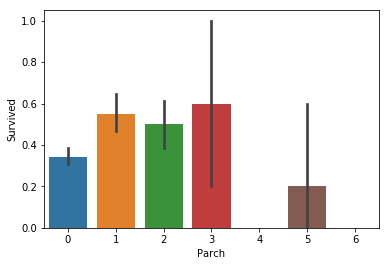

In [501]:
sns.barplot(x="Parch", y="Survived", data=titanic_train)
plt.show()

## Age Group v/s Survived

In [502]:
titanic_train["Age"] = titanic_train["Age"].fillna(-0.5)
titanic_test["Age"] = titanic_test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
titanic_train['AgeGroup'] = pd.cut(titanic_train["Age"], bins, labels = labels)
titanic_test['AgeGroup'] = pd.cut(titanic_test["Age"], bins, labels = labels)

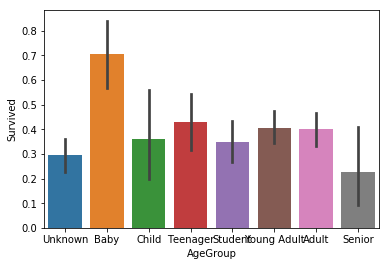

In [503]:
sns.barplot(x="AgeGroup", y="Survived", data=titanic_train)
plt.show()

## Cabin v/s Survived

In [504]:
titanic_train["CabinBool"] = (titanic_train["Cabin"].notnull().astype('int'))
titanic_test["CabinBool"] = (titanic_test["Cabin"].notnull().astype('int'))

print("Percentage of CabinBool = 1 who survived:", 
      titanic_train["Survived"][titanic_train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", 
      titanic_train["Survived"][titanic_train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)

('Percentage of CabinBool = 1 who survived:', 66.666666666666657)
('Percentage of CabinBool = 0 who survived:', 29.985443959243085)


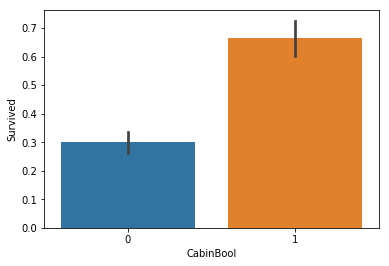

In [505]:
sns.barplot(x="CabinBool", y="Survived", data=titanic_train)
plt.show()

## Preprocessing of the Data Set

In [506]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
AgeGroup       418 non-null category
CabinBool      418 non-null int64
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 40.0+ KB


In [507]:
#Mapping fare into categorical value
titanic_train['FareBand'] = pd.qcut(titanic_train['Fare'], 4, labels = [1, 2, 3, 4])
titanic_test['FareBand'] = pd.qcut(titanic_test['Fare'], 4, labels = [1, 2, 3, 4])

# Replacing NA in embarked feature with 'S'
titanic_train = titanic_train.fillna({"Embarked": "S"})
titanic_test['Survived'] = 1

In [508]:
# Creating new column called AgeBand
combine = [titanic_train, titanic_test]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Capt','Col','Don','Dr','Major','Rev','Jonkheer','Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [509]:
#titanic_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

mr_age = titanic_train[titanic_train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = titanic_train[titanic_train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = titanic_train[titanic_train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = titanic_train[titanic_train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = titanic_train[titanic_train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = titanic_train[titanic_train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult", 0.0:"Unknown"}

In [510]:
for x in range(len(titanic_train["AgeGroup"])):
    if titanic_train["AgeGroup"][x] == "Unknown":
        titanic_train["AgeGroup"][x] = age_title_mapping[titanic_train["Title"][x]]

for x in range(len(titanic_test["AgeGroup"])):
    if titanic_test["AgeGroup"][x] == "Unknown":
        titanic_test["AgeGroup"][x] = age_title_mapping[titanic_test["Title"][x]]

In [511]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
titanic_train['AgeGroup'] = titanic_train['AgeGroup'].map(age_mapping)
titanic_test['AgeGroup'] = titanic_test['AgeGroup'].map(age_mapping)

In [512]:
# Sex feature
sex_mapping = {"male": 0, "female": 1}
titanic_train['Sex'] = titanic_train['Sex'].map(sex_mapping)
titanic_test['Sex'] = titanic_test['Sex'].map(sex_mapping)

# Replacing embarked categories with numerical values
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
titanic_train['Embarked'] = titanic_train['Embarked'].map(embarked_mapping)
titanic_test['Embarked'] = titanic_test['Embarked'].map(embarked_mapping)

In [513]:
# Replacing Fare with FareBand
for x in range(len(titanic_test["Fare"])):
    if pd.isnull(titanic_test["Fare"][x]):
        pclass = titanic_test["Pclass"][x] #Pclass = 3
        titanic_test["Fare"][x] = round(titanic_train[titanic_train["Pclass"] == pclass]["Fare"].mean(), 4)

In [514]:
# Dropping the cabin, ticket, fare, age, and name feature
titanic_train = titanic_train.drop(['Cabin'], axis = 1)
titanic_train = titanic_train.drop(['Ticket'], axis = 1)
titanic_train = titanic_train.drop(['Name'], axis = 1)
titanic_test = titanic_test.drop(['Cabin'], axis = 1)
titanic_test = titanic_test.drop(['Ticket'], axis = 1)
titanic_test = titanic_test.drop(['Name'], axis = 1)
titanic_train = titanic_train.drop(['Fare'], axis = 1)
titanic_test = titanic_test.drop(['Fare'], axis = 1)
titanic_train = titanic_train.drop(['Age'], axis = 1)
titanic_test = titanic_test.drop(['Age'], axis = 1)

# Exploring various models and evaluating their accuracies

In [515]:
predictors = titanic_train.drop(['Survived', 'PassengerId'], axis=1)
target = titanic_train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, random_state = 21)

In [516]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)

# Support Vector Machines
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)

# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)

# Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)

#Decision Tree
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)

# Random Forest
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)

# KNN or k-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)

# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)

# Gradient Boosting Classifier
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)

In [517]:
## Comparing the Accuracy of each of the model
model_accuracy = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Linear SVC', 'Decision Tree', 'SGD', 'GBC'],
    'Score': [acc_svc, acc_knn, acc_logreg, acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, 
              acc_decisiontree,acc_sgd, acc_gbk]})

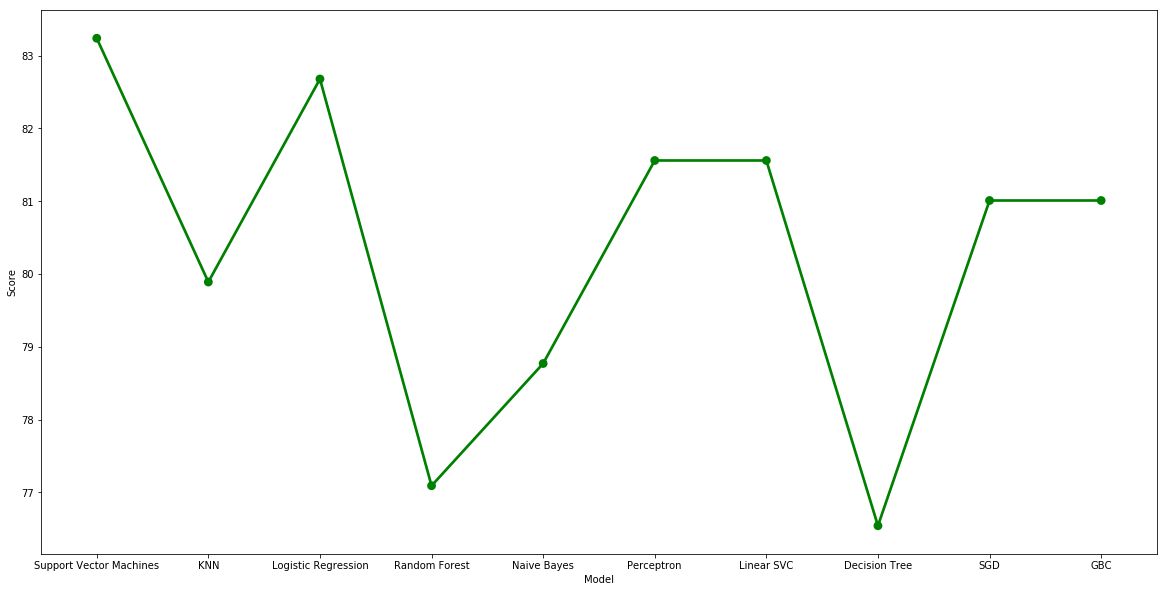

In [521]:
sns.pointplot(x="Model", y="Score", data=model_accuracy, color='green')
rcParams['figure.figsize'] = 20, 10
plt.show()

In [519]:
model_accuracy.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,83.24
2,Logistic Regression,82.68
5,Perceptron,81.56
6,Linear SVC,81.56
8,SGD,81.01
9,GBC,81.01
1,KNN,79.89
4,Naive Bayes,78.77
3,Random Forest,77.09
7,Decision Tree,76.54
